In [1]:
# !pip install graphviz pydotplus

In [2]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
import pandas as pd #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [5]:
df_train=pd.read_csv("StudentPerformance.csv")

In [6]:
df_train.head()

Student_id  gender parental level of education test preparation course  \
0           1  female           bachelor's degree                    none   
1           2  female                some college               completed   
2           3  female             master's degree                    none   
3           4    male          associate's degree      Partialy completed   
4           5    male                some college                    none   

   Software Engineering score  Machine Learningscore  DBMS score  \
0                          72                     72          74   
1                          69                     90          88   
2                          90                     95          93   
3                          47                     57          44   
4                          76                     78          75   

   Elective 1 score  Elective 2 score  Attendance  Study hours/Day  \
0                88                69        86.0                3   
1                76                63        86.0                1   
2                95                56        86.0                2   
3                94                40        85.0                2   
4                77                97        86.0                2   

   Assignment marks  Time spent on social media in mins  \
0                15                                  90   
1                15                                  90   
2                15                                  90   
3                15                                  90   
4                15                                  90   

  Participation in extra cirricular activities  Current Sem percentage  \
0                                           no                    75.0   
1                                          yes                    77.2   
2                                           no                    85.8   
3                                          yes                    56.4   
4                                           no                    80.6   

  Pass/Fail  Previous sem percentage  
0      Pass                       83  
1      Pass                       94  
2      Pass                       70  
3      Fail                       70  
4      Pass                       67

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Student_id                                    1014 non-null   int64  
 1   gender                                        1014 non-null   object 
 2   parental level of education                   1014 non-null   object 
 3   test preparation course                       1014 non-null   object 
 4   Software Engineering score                    1014 non-null   int64  
 5   Machine Learningscore                         1014 non-null   int64  
 6   DBMS score                                    1014 non-null   int64  
 7   Elective 1 score                              1014 non-null   int64  
 8   Elective 2 score                              1014 non-null   int64  
 9   Attendance                                    1014 non-null   f

In [8]:
df_train.columns

Index(['Student_id', 'gender', 'parental level of education',
       'test preparation course', 'Software Engineering score',
       'Machine Learningscore', 'DBMS score', 'Elective 1 score',
       'Elective 2 score', 'Attendance', 'Study hours/Day', 'Assignment marks',
       'Time spent on social media in mins',
       'Participation in extra cirricular activities',
       'Current Sem percentage', 'Pass/Fail', 'Previous sem percentage'],
      dtype='object')

In [9]:
def getLabelCount(df,target):
    return sorted([( labelValue,len(df.loc[df[target] == labelValue]) ) for labelValue in df[target].unique()])
TARGET = "Pass/Fail"
labelCount = getLabelCount(df_train,TARGET)
labelCount

[('Fail', 442), ('Pass', 572)]

<AxesSubplot:>

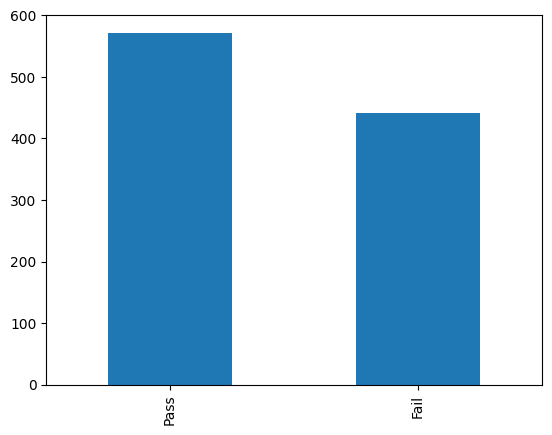

In [10]:
df_train['Pass/Fail'].value_counts().plot(kind='bar')

In [11]:
def dynamic_label_encode(df):
    encoded_df = df.copy()
    label_encoders = {}

    for column in df.select_dtypes(include=['object']).columns:
        le = preprocessing.LabelEncoder()
        encoded_df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return encoded_df, label_encoders

encoded_df, label_encoders = dynamic_label_encode(df_train)

In [12]:
label_encoders

{'gender': LabelEncoder(),
 'parental level of education': LabelEncoder(),
 'test preparation course': LabelEncoder(),
 'Participation in extra cirricular activities': LabelEncoder(),
 'Pass/Fail': LabelEncoder()}

In [13]:
b=encoded_df
b.to_csv("preprocess.csv")
encoded_df

Student_id  gender  parental level of education  \
0              1       0                            1   
1              2       0                            4   
2              3       0                            3   
3              4       1                            0   
4              5       1                            4   
...          ...     ...                          ...   
1009        1010       1                            1   
1010        1011       1                            1   
1011        1012       0                            1   
1012        1013       0                            1   
1013        1014       1                            1   

      test preparation course  Software Engineering score  \
0                           3                          72   
1                           2                          69   
2                           3                          90   
3                           1                          47   
4                           3                          76   
...                       ...                         ...   
1009                        3                          77   
1010                        0                          73   
1011                        3                          78   
1012                        3                          70   
1013                        0                          65   

      Machine Learningscore  DBMS score  Elective 1 score  Elective 2 score  \
0                        72          74                88                69   
1                        90          88                76                63   
2                        95          93                95                56   
3                        57          44                94                40   
4                        78          75                77                97   
...                     ...         ...               ...               ...   
1009                     63          73                73                57   
1010                     88          77                74                88   
1011                     70          81                75                83   
1012                     70          80                60                80   
1013                     66          64                56                67   

      Attendance  Study hours/Day  Assignment marks  \
0           86.0                3                15   
1           86.0                1                15   
2           86.0                2                15   
3           85.0                2                15   
4           86.0                2                15   
...          ...              ...               ...   
1009        87.0                6                16   
1010        90.0                4                19   
1011        80.0                3                15   
1012        91.0                3                17   
1013        86.0                1                18   

      Time spent on social media in mins  \
0                                     90   
1                                     90   
2                                     90   
3                                     90   
4                                     90   
...                                  ...   
1009                                  75   
1010                                  75   
1011                                 150   
1012                                  25   
1013                                  60   

      Participation in extra cirricular activities  Current Sem percentage  \
0                                                0                    75.0   
1                                                2                    77.2   
2                                                0                    85.8   
3                                                2                    56.4   
4                                                0         

In [14]:
df_numerics_only = df_train.select_dtypes(include=np.number)

In [15]:
to_scale = [col for col in encoded_df.columns if encoded_df[col].max()>1]
scaler = RobustScaler()
scaled =scaler.fit_transform(encoded_df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# replace original columns with scaled columns
for col in scaled:
    encoded_df[col] = scaled[col]

In [16]:
to_scale

['Student_id',
 'parental level of education',
 'test preparation course',
 'Software Engineering score',
 'Machine Learningscore',
 'DBMS score',
 'Elective 1 score',
 'Elective 2 score',
 'Attendance',
 'Study hours/Day',
 'Assignment marks',
 'Time spent on social media in mins',
 'Participation in extra cirricular activities',
 'Current Sem percentage',
 'Previous sem percentage']

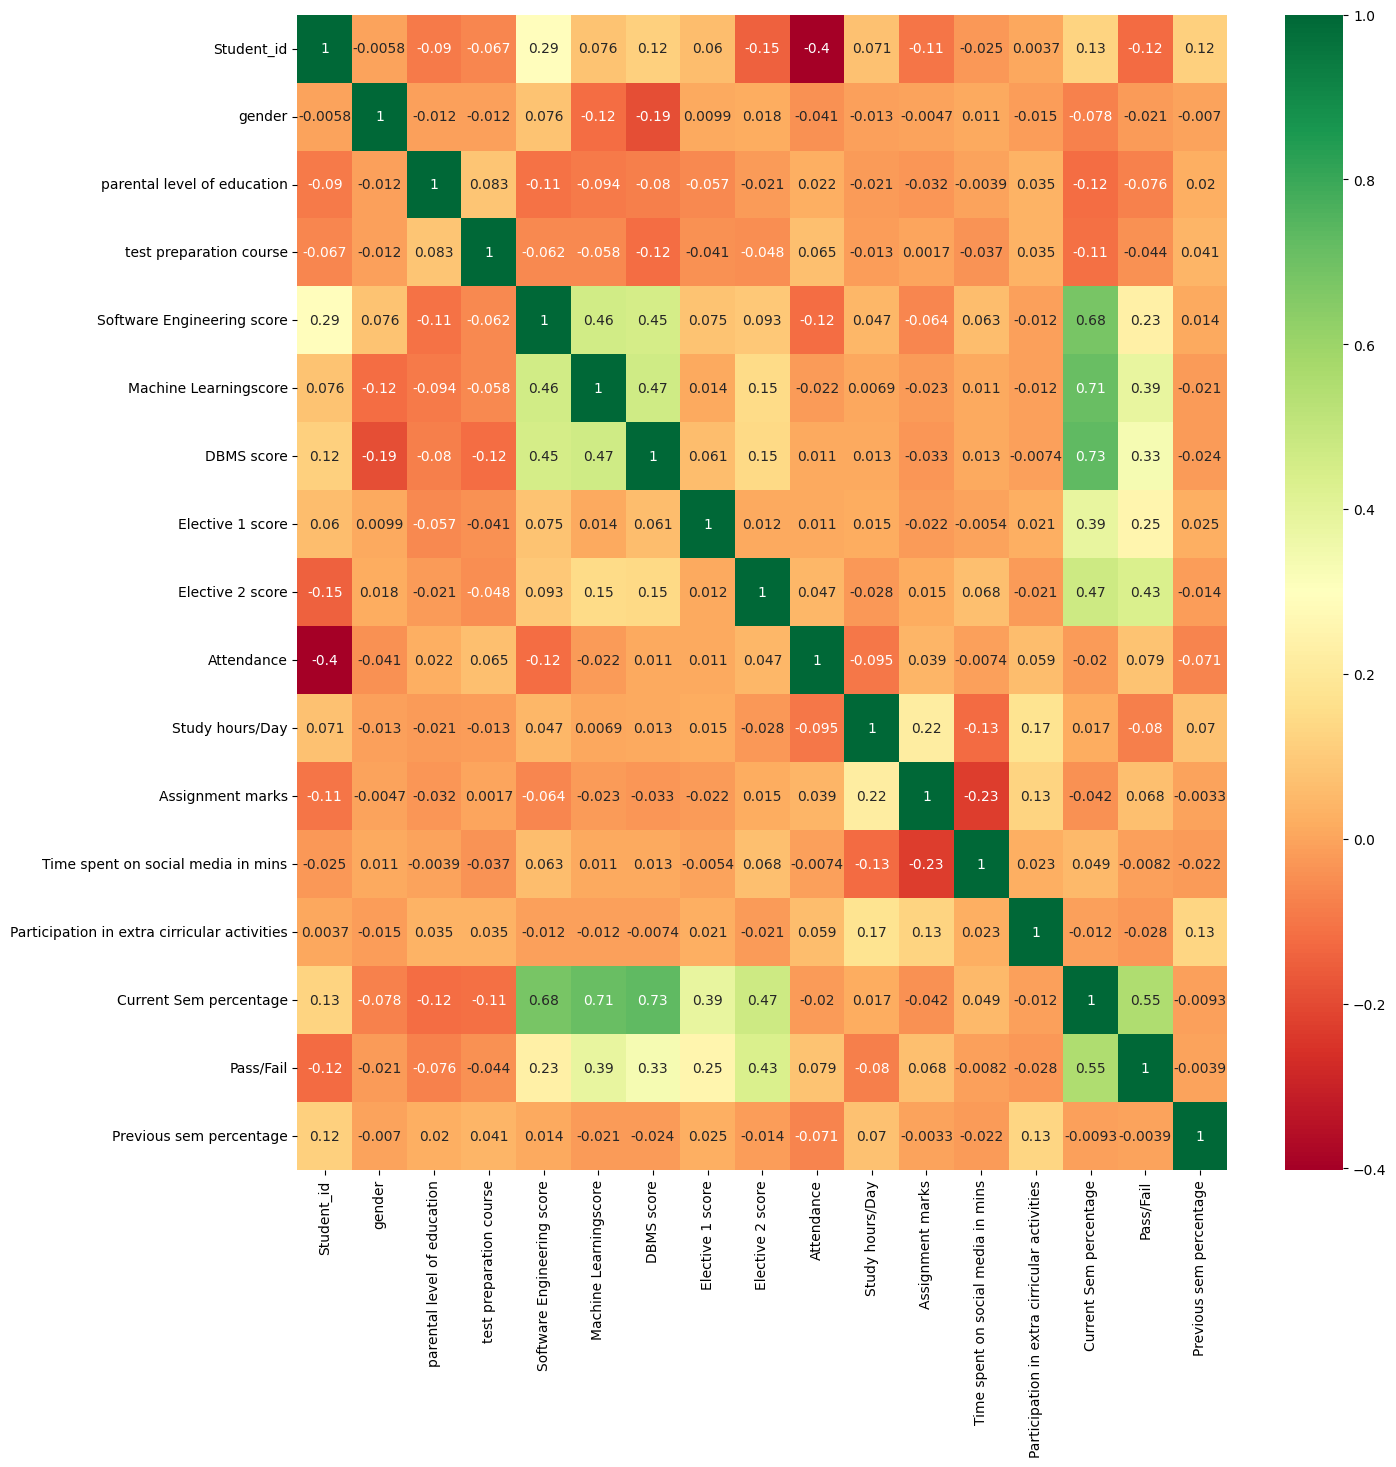

In [17]:
corrmat = encoded_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
g=sns.heatmap(encoded_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
X=encoded_df.drop(["Pass/Fail",'Current Sem percentage','Student_id'], axis=1)
Y=encoded_df["Pass/Fail"]
print(X.shape)
print(Y.shape)

(1014, 14)
(1014,)


In [19]:
# sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.25)

In [20]:
print(X_train.shape)
print(X_test.shape)

(760, 14)
(254, 14)


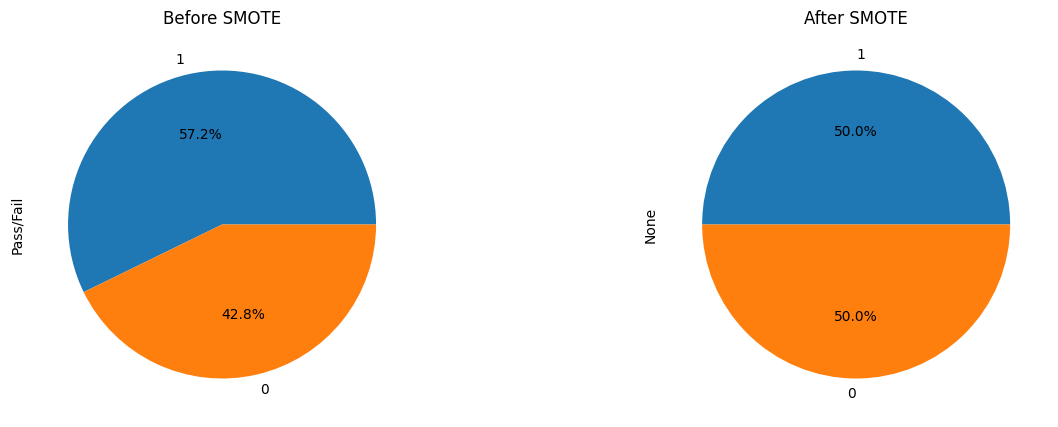

In [21]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train_new, y_train_new = smote.fit_resample(X_train, y_train.values.ravel())
import matplotlib.ticker as mtick

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.pie(autopct='%.1f%%',ax=ax1)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.pie(autopct='%.1f%%',ax=ax2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

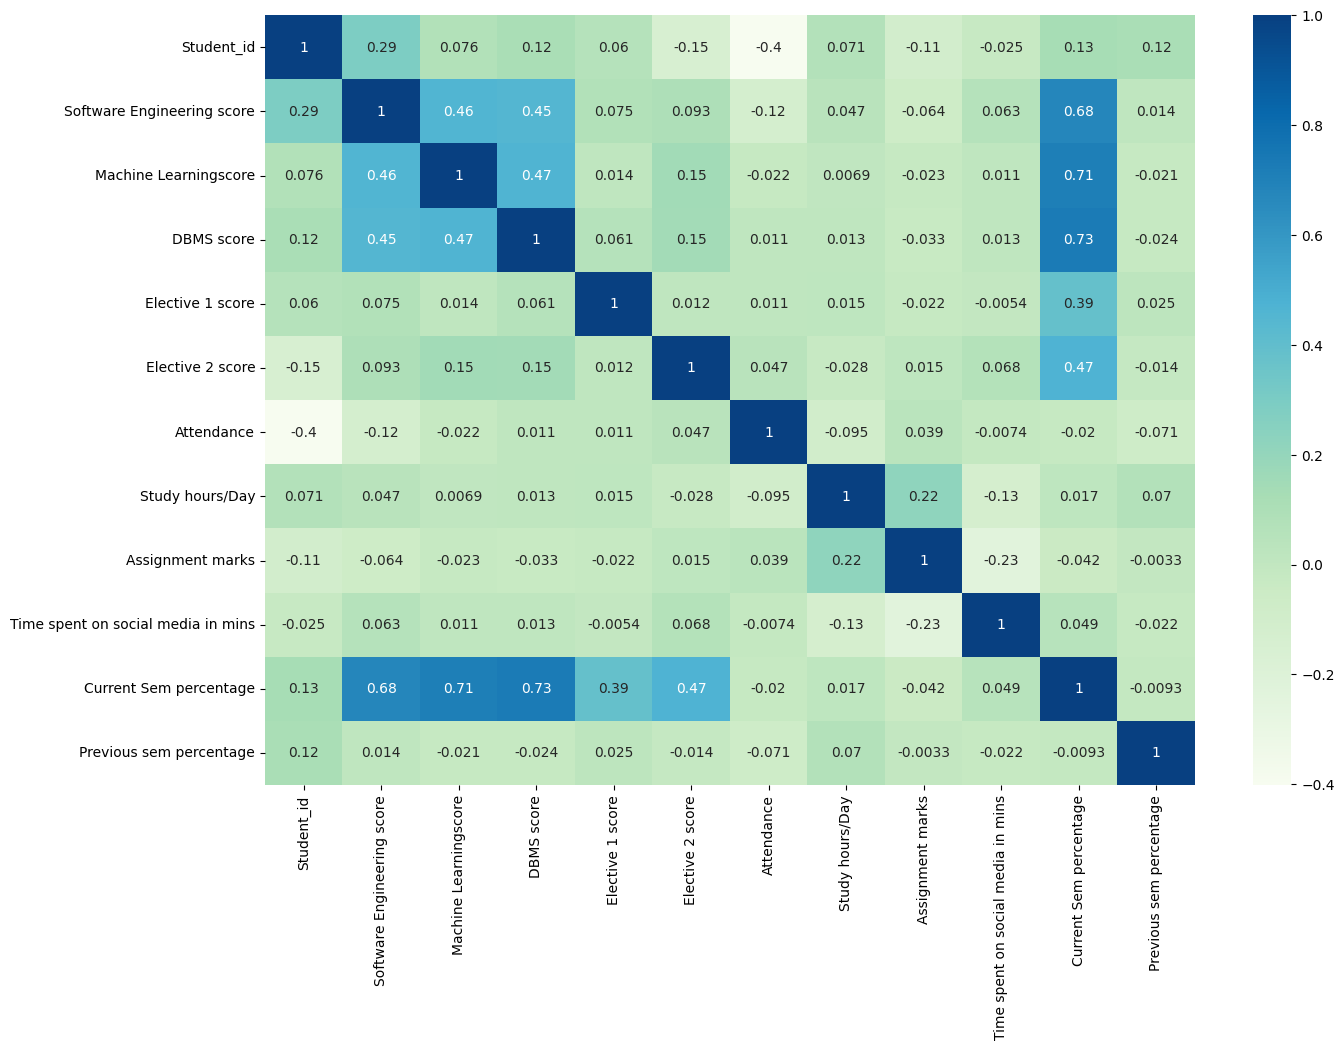

In [22]:
plt.figure(figsize= (15, 10))
sns.heatmap(df_numerics_only.corr(), annot=True, cmap= 'GnBu')
plt.show()

In [23]:
lr =  LogisticRegression()
lr.fit(X_train_new, y_train_new)
y_pred=lr.predict(X_test)

In [24]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Logistic Regression:",metrics.accuracy_score(y_test, y_pred))

Accuracy Logistic Regression: 0.7952755905511811


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report Logistic Regression : \n',matrix)

Confusion matrix : 
 [[112  25]
 [ 27  90]]
Outcome values : 
 112 25 27 90
Classification report Logistic Regression : 
               precision    recall  f1-score   support

           1       0.81      0.82      0.81       137
           0       0.78      0.77      0.78       117

    accuracy                           0.80       254
   macro avg       0.79      0.79      0.79       254
weighted avg       0.80      0.80      0.80       254



In [73]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("LogisticRegression:",metrics.accuracy_score(y_test, y_pred))

# Save the trained model to a file using joblib
# model_filename1 = "models/Logistic_Regression_Classify_model.joblib"
# joblib.dump(lr, model_filename1)
# print(f"Model saved as {model_filename1}")

LogisticRegression: 0.7952755905511811
Model saved as models/Logistic_Regression_Classify_model.joblib


In [27]:
X_test.shape

(254, 14)

In [28]:
X_train_new

gender  parental level of education  test preparation course  \
0         0                    -0.500000                      0.0   
1         1                     0.250000                      1.0   
2         0                    -0.500000                      0.0   
3         1                     0.750000                     -1.0   
4         0                     0.000000                      1.0   
..      ...                          ...                      ...   
865       0                     0.326713                      1.0   
866       0                     0.389567                      1.0   
867       1                    -0.130459                      0.0   
868       1                    -0.071279                      0.0   
869       0                     0.750000                      0.0   

     Software Engineering score  Machine Learningscore  DBMS score  \
0                      0.388889               0.842105    1.160000   
1                     -0.555556               0.547368    0.600000   
2                     -0.055556              -0.378947    0.040000   
3                     -0.277778              -0.421053   -0.640000   
4                     -0.888889              -0.210526   -0.040000   
..                          ...                    ...         ...   
865                   -0.782191              -0.249286   -0.009096   
866                   -2.927735              -1.461020   -1.725639   
867                    0.313923               0.552791   -0.220784   
868                    0.524340               0.722232   -0.429097   
869                   -0.056975              -0.412425   -0.506652   

     Elective 1 score  Elective 2 score  Attendance  Study hours/Day  \
0           -0.048193          0.428571    0.555556         1.000000   
1            1.060241         -0.095238   -1.888889        -0.500000   
2           -1.253012          0.619048   -0.833333         0.000000   
3           -0.096386          0.428571    0.055556        -0.500000   
4            1.493976          0.142857   -0.611111        -0.500000   
..                ...               ...         ...              ...   
865          0.292458         -1.047098    0.154033        -0.346574   
866         -0.907479         -1.461868   -0.080096        -0.500000   
867          0.136160         -0.902682    0.768073         0.521836   
868          0.227425         -0.925227    0.873281         0.285117   
869          0.616632          0.316227   -1.005706         1.000000   

     Assignment marks  Time spent on social media in mins  \
0           -0.200000                           -0.500000   
1           -0.800000                           -0.333333   
2            0.600000                            1.500000   
3           -0.800000                            0.666667   
4            0.000000                            0.666667   
..                ...                                 ...   
865         -0.400000                            0.462099   
866          0.415539                           -0.259712   
867          0.808734                           -0.420306   
868          0.714047                           -0.380853   
869          0.487174                            1.264946   

     Participation in extra cirricular activities  Previous sem percentage  
0                                        1.000000                 0.357143  
1                                        1.000000                 0.000000  
2                                        1.000000                -0.500000  
3                                        0.000000                 0.357143  
4                                        0.000000                 0.000000  
..                                            ...                      ...  
865                                     -0.306851                -0.043836  
866                                     -0.519423                -0.259712  
867                                      1.0

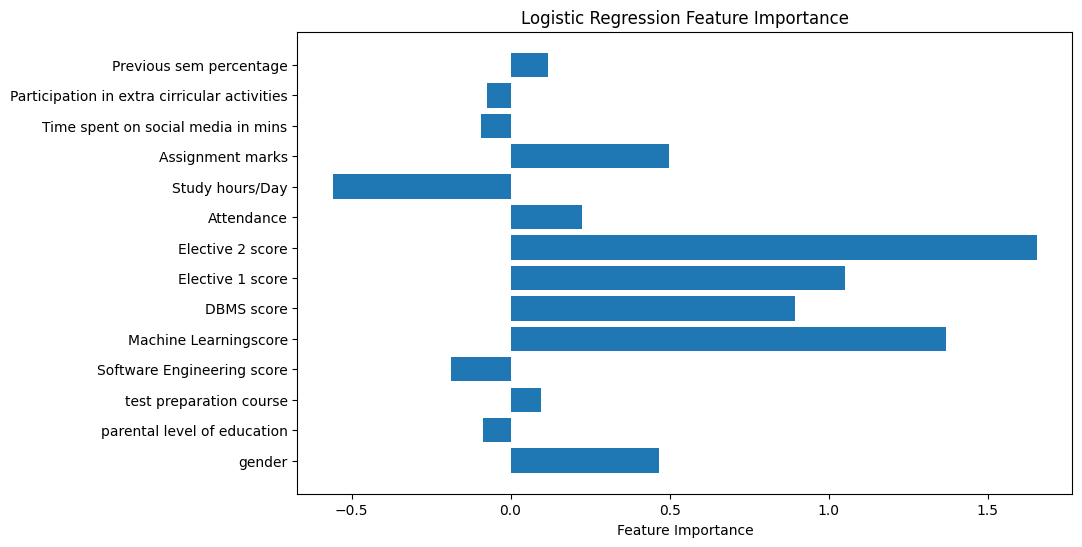

In [29]:
feature_importances = lr.coef_[0]

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train_new.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

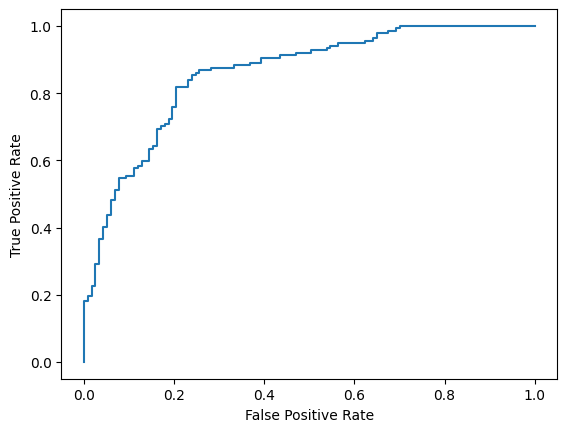

In [30]:
#define metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
y_test

366    0
112    0
906    0
959    1
692    1
      ..
344    1
592    0
777    1
181    0
804    0
Name: Pass/Fail, Length: 254, dtype: int32

In [32]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train_new, y_train_new)  
y_pred4=classifier.predict(X_test)

In [33]:
from ipywidgets import interact, widgets

In [34]:
X_test

gender  parental level of education  test preparation course  \
366       1                         0.00                      0.0   
112       1                        -0.50                      1.0   
906       1                        -0.50                      1.0   
959       0                        -0.50                      0.0   
692       0                        -0.50                      1.0   
..      ...                          ...                      ...   
344       1                         0.50                      1.0   
592       0                        -0.50                      0.0   
777       1                        -0.50                      1.0   
181       0                         0.50                      1.0   
804       0                         0.75                      1.0   

     Software Engineering score  Machine Learningscore  DBMS score  \
366                   -0.055556              -0.463158       -0.64   
112                   -0.888889              -0.673684       -0.88   
906                   -0.055556               1.094737       -0.80   
959                   -0.444444               0.926316        0.28   
692                    0.777778              -0.421053       -0.28   
..                          ...                    ...         ...   
344                    0.500000               0.168421       -0.08   
592                    0.055556               0.421053        0.24   
777                    0.722222               1.094737        0.28   
181                   -1.333333              -0.210526       -0.12   
804                    0.111111               0.042105        1.00   

     Elective 1 score  Elective 2 score  Attendance  Study hours/Day  \
366         -0.867470         -0.523810    0.277778              0.0   
112         -0.048193          0.809524   -0.277778              1.0   
906          1.590361         -0.428571   -1.666667              0.0   
959         -0.144578         -0.523810   -0.833333              0.5   
692          0.096386          0.428571   -0.833333              0.5   
..                ...               ...         ...              ...   
344          0.385542          0.666667   -0.555556              0.0   
592         -0.192771         -0.857143    0.055556              0.0   
777         -0.433735         -0.285714   -1.611111             -0.5   
181         -0.578313          0.428571    0.555556              0.0   
804         -0.771084         -0.952381   -0.222222             -0.5   

     Assignment marks  Time spent on social media in mins  \
366               0.6                           -0.333333   
112              -0.2                           -0.500000   
906               0.2                           -0.333333   
959               0.0                            0.666667   
692               0.0                            0.666667   
..                ...                                 ...   
344               0.6                           -0.333333   
592              -1.0                           -0.500000   
777              -1.0                            0.000000   
181               0.4                           -0.583333   
804               0.2                            0.250000   

     Participation in extra cirricular activities  Previous sem percentage  
366                                           1.0                 0.357143  
112                                           1.0                 0.357143  
906                                           0.0                 1.357143  
959                                           1.0                 1.285714  
692                                           1.0                -0.428571  
..                                            ...                      ...  
344                                           1.0                -0.500000  
592                                           0.0                -0.285714  
777                                         

In [35]:
encoded_df.columns

Index(['Student_id', 'gender', 'parental level of education',
       'test preparation course', 'Software Engineering score',
       'Machine Learningscore', 'DBMS score', 'Elective 1 score',
       'Elective 2 score', 'Attendance', 'Study hours/Day', 'Assignment marks',
       'Time spent on social media in mins',
       'Participation in extra cirricular activities',
       'Current Sem percentage', 'Pass/Fail', 'Previous sem percentage'],
      dtype='object')

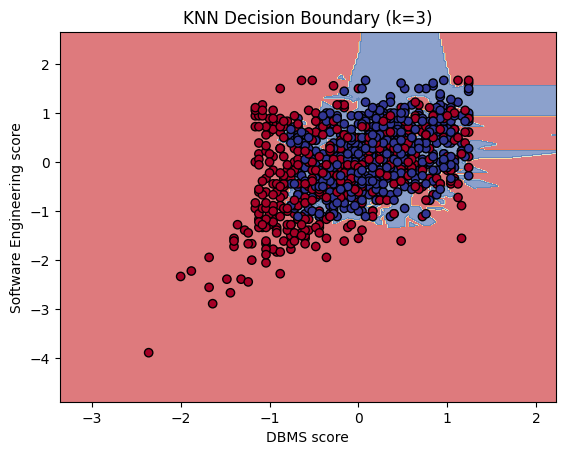

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

X=encoded_df[['DBMS score','Software Engineering score']].values
y=encoded_df['Pass/Fail'].values
# Create a KNN classifier
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the data
knn.fit(X, y)

# Define a mesh grid to create a decision boundary plot
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.title(f'KNN Decision Boundary (k={k})')
plt.xlabel('DBMS score')
plt.ylabel('Software Engineering score')
plt.show()

In [37]:
from sklearn import metrics
print("Accuracy KNN:",metrics.accuracy_score(y_test, y_pred4))

Accuracy KNN: 0.7480314960629921


In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred4

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification KNeighborsClassifier : \n',matrix)

Confusion matrix : 
 [[121  16]
 [ 48  69]]
Outcome values : 
 121 16 48 69
Classification KNeighborsClassifier : 
               precision    recall  f1-score   support

           1       0.72      0.88      0.79       137
           0       0.81      0.59      0.68       117

    accuracy                           0.75       254
   macro avg       0.76      0.74      0.74       254
weighted avg       0.76      0.75      0.74       254



In [74]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("KNeighborsClassifier :",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
# model_filename1 = "models/KNeighbors_Classifier_Classify_model.joblib"
# joblib.dump(classifier, model_filename1)
# print(f"Model saved as {model_filename1}")

KNeighborsClassifier : 0.7480314960629921
Model saved as models/KNeighbors_Classifier_Classify_model.joblib


In [40]:
# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the model to your training data
clf.fit(X_train_new, y_train_new)

DecisionTreeClassifier()

In [41]:
y_pred1 = clf.predict(X_test)

In [42]:
# X=encoded_df.drop(["Pass/Fail",'Current Sem percentage','Student_id'], axis=1)
# Y=encoded_df["Pass/Fail"]

In [43]:
X

array([[ 0.2       ,  0.11111111],
       [ 0.76      , -0.05555556],
       [ 0.96      ,  1.11111111],
       ...,
       [ 0.48      ,  0.44444444],
       [ 0.44      ,  0.        ],
       [-0.2       , -0.27777778]])

In [44]:
feature_importances = clf.feature_importances_
print(feature_importances)

[0.         0.         0.         0.05076097 0.23907937 0.11259156
 0.27447971 0.30834538 0.00194518 0.         0.00229885 0.00066226
 0.         0.00983672]


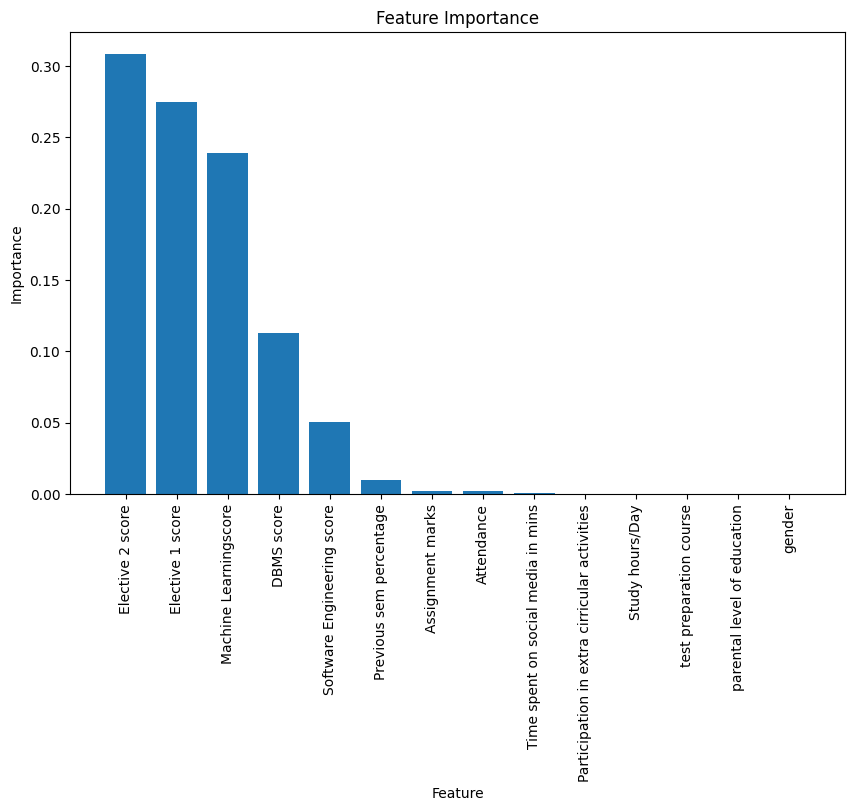

In [45]:
# Replace this with your actual feature names in the same order as your dataset
feature_names = X_train_new.columns

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train_new.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train_new.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [46]:
from sklearn import tree
plt.figure(figsize=(250, 200))
tree.plot_tree(clf, feature_names=X_train_new.columns)

#Two  lines to make our compiler able to draw:
plt.savefig('a.jpg')

In [47]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_text
tree_text = export_text(clf, feature_names=X_train_new.columns.tolist(), spacing=3, decimals=2)
print(tree_text)


|--- Elective 2 score <= -0.67
|   |--- Elective 2 score <= -0.72
|   |   |--- class: 0
|   |--- Elective 2 score >  -0.72
|   |   |--- DBMS score <= 0.02
|   |   |   |--- Attendance <= -0.59
|   |   |   |   |--- Assignment marks <= -0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Assignment marks >  -0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Attendance >  -0.59
|   |   |   |   |--- class: 0
|   |   |--- DBMS score >  0.02
|   |   |   |--- Elective 1 score <= -0.80
|   |   |   |   |--- class: 0
|   |   |   |--- Elective 1 score >  -0.80
|   |   |   |   |--- class: 1
|--- Elective 2 score >  -0.67
|   |--- Machine Learningscore <= -0.55
|   |   |--- Machine Learningscore <= -0.82
|   |   |   |--- class: 0
|   |   |--- Machine Learningscore >  -0.82
|   |   |   |--- DBMS score <= -0.73
|   |   |   |   |--- class: 0
|   |   |   |--- DBMS score >  -0.73
|   |   |   |   |--- Software Engineering score <= -1.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- 

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred1

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification DecisionTreeClassifier : \n',matrix)

Confusion matrix : 
 [[135   2]
 [  2 115]]
Outcome values : 
 135 2 2 115
Classification DecisionTreeClassifier : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       137
           0       0.98      0.98      0.98       117

    accuracy                           0.98       254
   macro avg       0.98      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254



In [75]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("DecisionTreeClassifier  :",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
# model_filename1 = "models/DecisionTree_Classifier_Classify_model.joblib"
# joblib.dump(classifier, model_filename1)
# print(f"Model saved as {model_filename1}")

DecisionTreeClassifier  : 0.7480314960629921
Model saved as models/DecisionTree_Classifier_Classify_model.joblib


In [50]:
model = SVC(kernel='linear')  # You can choose different kernel functions like 'linear', 'rbf', etc.

# Train the model on the training data
model.fit(X_train_new, y_train_new)

# Make predictions on the test data
y_pred2 = model.predict(X_test)

# svm

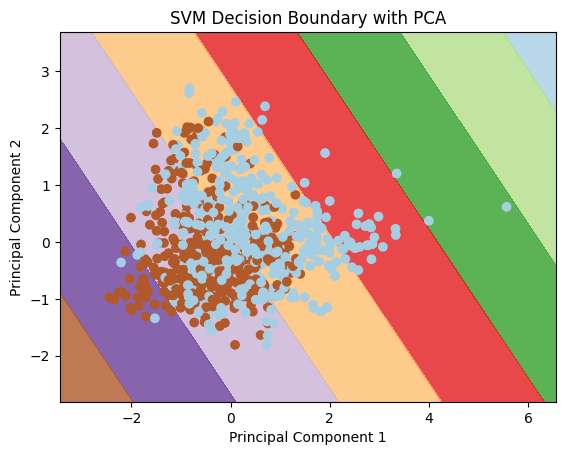

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Apply PCA to reduce the dimensionality to 2 for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_new)
y=y_train_new
# Create an SVM classifier
clf = SVC(kernel='linear', C=1)
clf.fit(X_reduced, y)

# Create a mesh grid to visualize the decision boundary
h = .02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and support vectors
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA')
plt.show()


In [52]:
X_train_new

gender  parental level of education  test preparation course  \
0         0                    -0.500000                      0.0   
1         1                     0.250000                      1.0   
2         0                    -0.500000                      0.0   
3         1                     0.750000                     -1.0   
4         0                     0.000000                      1.0   
..      ...                          ...                      ...   
865       0                     0.326713                      1.0   
866       0                     0.389567                      1.0   
867       1                    -0.130459                      0.0   
868       1                    -0.071279                      0.0   
869       0                     0.750000                      0.0   

     Software Engineering score  Machine Learningscore  DBMS score  \
0                      0.388889               0.842105    1.160000   
1                     -0.555556               0.547368    0.600000   
2                     -0.055556              -0.378947    0.040000   
3                     -0.277778              -0.421053   -0.640000   
4                     -0.888889              -0.210526   -0.040000   
..                          ...                    ...         ...   
865                   -0.782191              -0.249286   -0.009096   
866                   -2.927735              -1.461020   -1.725639   
867                    0.313923               0.552791   -0.220784   
868                    0.524340               0.722232   -0.429097   
869                   -0.056975              -0.412425   -0.506652   

     Elective 1 score  Elective 2 score  Attendance  Study hours/Day  \
0           -0.048193          0.428571    0.555556         1.000000   
1            1.060241         -0.095238   -1.888889        -0.500000   
2           -1.253012          0.619048   -0.833333         0.000000   
3           -0.096386          0.428571    0.055556        -0.500000   
4            1.493976          0.142857   -0.611111        -0.500000   
..                ...               ...         ...              ...   
865          0.292458         -1.047098    0.154033        -0.346574   
866         -0.907479         -1.461868   -0.080096        -0.500000   
867          0.136160         -0.902682    0.768073         0.521836   
868          0.227425         -0.925227    0.873281         0.285117   
869          0.616632          0.316227   -1.005706         1.000000   

     Assignment marks  Time spent on social media in mins  \
0           -0.200000                           -0.500000   
1           -0.800000                           -0.333333   
2            0.600000                            1.500000   
3           -0.800000                            0.666667   
4            0.000000                            0.666667   
..                ...                                 ...   
865         -0.400000                            0.462099   
866          0.415539                           -0.259712   
867          0.808734                           -0.420306   
868          0.714047                           -0.380853   
869          0.487174                            1.264946   

     Participation in extra cirricular activities  Previous sem percentage  
0                                        1.000000                 0.357143  
1                                        1.000000                 0.000000  
2                                        1.000000                -0.500000  
3                                        0.000000                 0.357143  
4                                        0.000000                 0.000000  
..                                            ...                      ...  
865                                     -0.306851                -0.043836  
866                                     -0.519423                -0.259712  
867                                      1.0

In [53]:
X_train_new.iloc[:, 5]

0      1.160000
1      0.600000
2      0.040000
3     -0.640000
4     -0.040000
         ...   
865   -0.009096
866   -1.725639
867   -0.220784
868   -0.429097
869   -0.506652
Name: DBMS score, Length: 870, dtype: float64

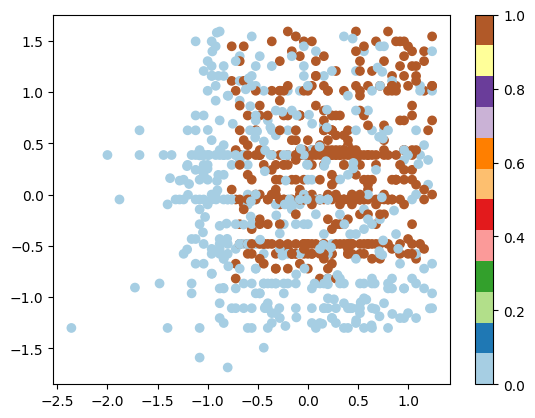

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from matplotlib.animation import FuncAnimation
# Train an SVM model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train_new, y_train_new)

# Create a 2D scatter plot of the data points
def plot_data():
    plt.scatter(X_train_new.iloc[:, 5], X_train_new.iloc[:, 6], c=y_train_new, cmap=plt.cm.Paired)

# Create a function to plot the hyperplane
def plot_hyperplane(coef, intercept):
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
    zz = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]
    plt.contour(xx, yy, zz, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

# Create an animation to move the hyperplane
fig, ax = plt.subplots()
ani = FuncAnimation(fig, lambda i: plot_hyperplane(clf.coef_[0], clf.intercept_[0] - i * 0.05),
                    frames=range(50), repeat=True)
plt.colorbar(plot_data(), ax=ax)

plt.show()

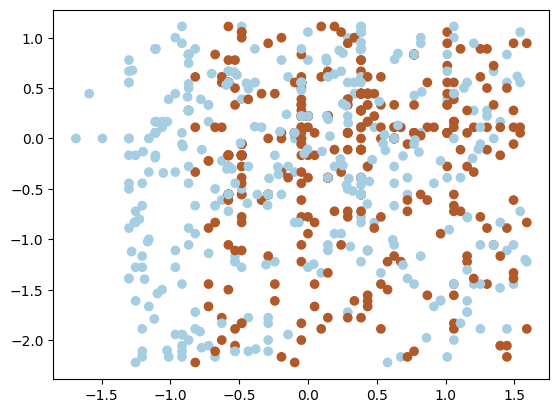

In [55]:
plt.scatter(X_train_new.iloc[:, 6], X_train_new.iloc[:, 8], c=y_train_new, cmap=plt.cm.Paired)

In [58]:
# ax = plt.gca()
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
# Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
# plt.show()

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred2

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification SVC : \n',matrix)

Confusion matrix : 
 [[111  26]
 [ 25  92]]
Outcome values : 
 111 26 25 92
Classification SVC : 
               precision    recall  f1-score   support

           1       0.82      0.81      0.81       137
           0       0.78      0.79      0.78       117

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.80       254
weighted avg       0.80      0.80      0.80       254



In [77]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("SVC:",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
# model_filename1 = "models/SVC_linear_Classify_model.joblib"
# joblib.dump(classifier, model_filename1)
# print(f"Model saved as {model_filename1}")

SVC: 0.7480314960629921


In [61]:
model1 = SVC(kernel='rbf')  # You can choose different kernel functions like 'linear', 'rbf', etc.

# Train the model on the training data
model1.fit(X_train_new, y_train_new)

# Make predictions on the test data
y_pred10 = model1.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred10

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification SVC : \n',matrix)

Confusion matrix : 
 [[119  18]
 [ 11 106]]
Outcome values : 
 119 18 11 106
Classification SVC : 
               precision    recall  f1-score   support

           1       0.92      0.87      0.89       137
           0       0.85      0.91      0.88       117

    accuracy                           0.89       254
   macro avg       0.89      0.89      0.89       254
weighted avg       0.89      0.89      0.89       254



In [78]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("SVC rbf:",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
# model_filename1 = "models/SVC_rbf_Classify_model.joblib"
# joblib.dump(classifier, model_filename1)
# print(f"Model saved as {model_filename1}")

SVC rbf: 0.7480314960629921
Model saved as models/SVC_rbf_Classify_model.joblib


# RandomForestClassifier

In [64]:
# Create an instance of the DecisionTreeClassifier
random = RandomForestClassifier()

# Fit the model to your training data
random.fit(X_train_new, y_train_new)

RandomForestClassifier()

In [65]:
# Make predictions on the test data
y_pred5 = model.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred5

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification SVC : \n',matrix)

Confusion matrix : 
 [[111  26]
 [ 25  92]]
Outcome values : 
 111 26 25 92
Classification SVC : 
               precision    recall  f1-score   support

           1       0.82      0.81      0.81       137
           0       0.78      0.79      0.78       117

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.80       254
weighted avg       0.80      0.80      0.80       254



In [79]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy random_forest:",metrics.accuracy_score(y_test, y_pred5))

# Save the trained model to a file using joblib
# model_filename1 = "models/RandomForestClassifier_Classify_model.joblib"
# joblib.dump(random, model_filename1)
# print(f"Model saved as {model_filename1}")

Accuracy random_forest: 0.7992125984251969
Model saved as models/RandomForestClassifier_Classify_model.joblib


In [81]:
X_train_new.shape[1]

14

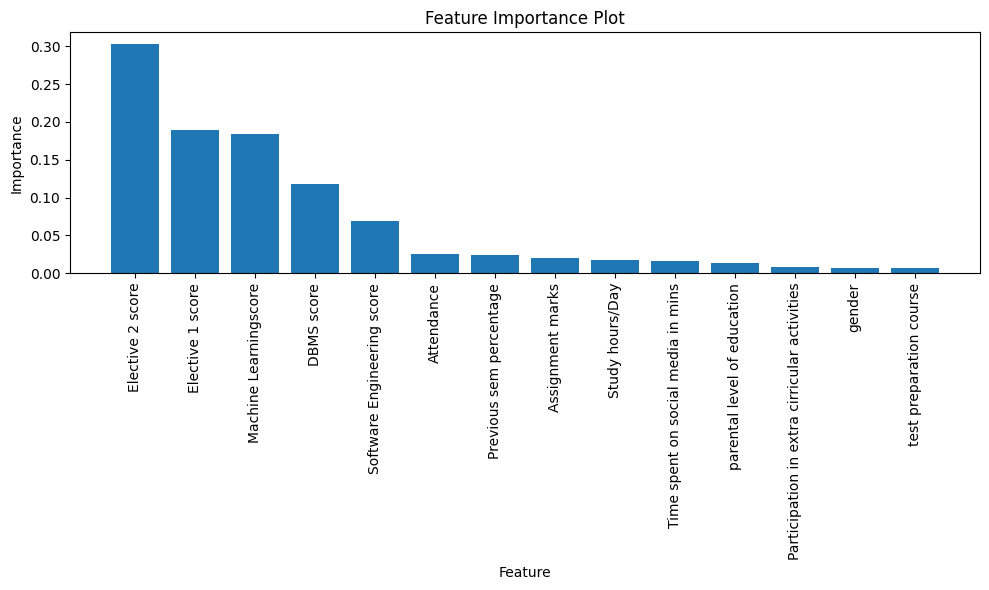

In [82]:
# Get feature importances from the model
importances = random.feature_importances_

# Get the feature names
feature_names = X_train_new.columns  # Replace with your feature names if needed

# Sort the features by importance
sorted_indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance Plot")
plt.bar(range(X_train_new.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X_train_new.shape[1]), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [83]:
# You can also get feature importances
feature_importances = random.feature_importances_
print('Feature Importances:')
for feature, importance in zip(X_train_new.columns, feature_importances):
    print(f'{feature}: {importance}')

Feature Importances:
gender: 0.006407223276407675
parental level of education: 0.013866688443421335
test preparation course: 0.006313350041368898
Software Engineering score: 0.06860899817567734
Machine Learningscore: 0.1835179761232933
DBMS score: 0.11828304547332101
Elective 1 score: 0.18994471926577666
Elective 2 score: 0.3034795391049465
Attendance: 0.024692131840721686
Study hours/Day: 0.017046020122282773
Assignment marks: 0.020113812847198577
Time spent on social media in mins: 0.01578634049265671
Participation in extra cirricular activities: 0.00782266484861946
Previous sem percentage: 0.024117489944307964


In [84]:
import pandas as pd
import numpy as np

def bootstrap_sample_df(df, n_samples):
    n_data = len(df)
    bootstrap_samples = []
    for _ in range(n_samples):
        sample_indices = np.random.randint(0, n_data, n_data)
        sample = df.iloc[sample_indices]
        bootstrap_samples.append(sample)
    return bootstrap_samples
n_bootstrap_samples = 5
bootstrap_samples = bootstrap_sample_df(X_train_new, n_bootstrap_samples)

for i, sample in enumerate(bootstrap_samples):
    print(f"Bootstrap Sample {i + 1}:\n{sample}")

Bootstrap Sample 1:
     gender  parental level of education  test preparation course  \
280       0                     0.500000                 1.000000   
354       0                    -0.500000                 0.000000   
850       1                     0.653488                -1.000000   
631       1                     0.000000                 1.000000   
534       1                    -0.500000                 0.000000   
..      ...                          ...                      ...   
142       0                     0.250000                 0.000000   
807       1                     0.530351                 0.292865   
342       1                     0.000000                 0.000000   
82        1                    -0.500000                 1.000000   
435       0                    -0.500000                 1.000000   

     Software Engineering score  Machine Learningscore  DBMS score  \
280                    0.055556               0.294737    0.040000   
354        

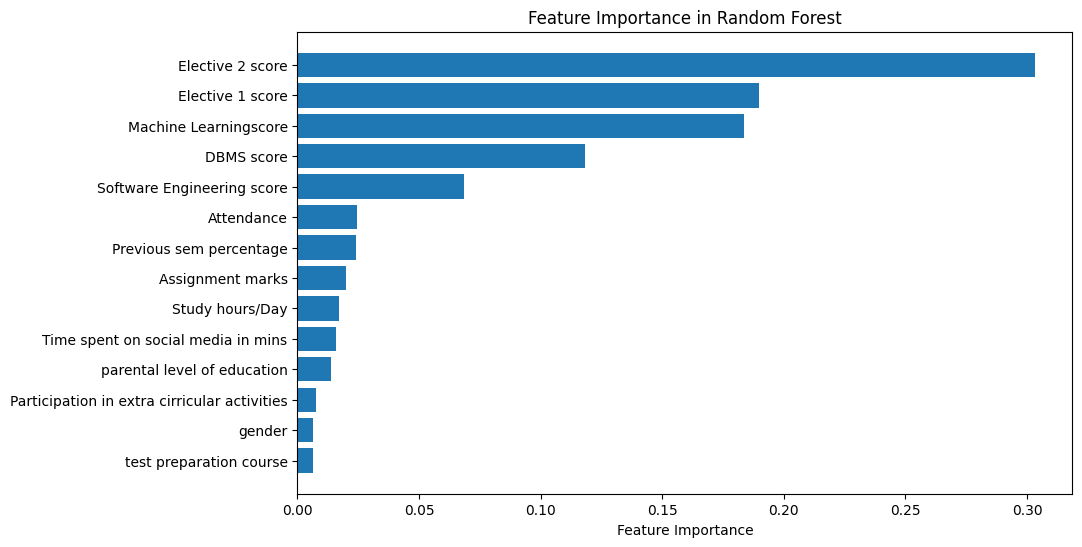

Selected Features: ['Elective 1 score', 'Elective 2 score']


In [85]:
# Get the names of the features
feature_names = X_train_new.columns

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

# Random feature selection for visualization (e.g., top 2 features)
selected_features = [feature_names[i] for i in sorted_idx[-2:]]

# Visualize the selected features
print("Selected Features:", selected_features)

In [86]:
from PIL import Image, ImageDraw, ImageFont

# Create a blank white image
width, height = 800, 600
image = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(image)

# Define the text and font
text = "Hello, World!"
font = ImageFont.truetype("arial.ttf", 30)
font1 = ImageFont.truetype("arial.ttf", 25)

# Define starting position
x, y = 10, 10

# Loop to draw text multiple times

print('Feature Importances:')
draw.text((x, y),'Feature Importances:', fill="black", font=font)
y += 40 
for feature, importance in zip(X_train_new.columns, feature_importances):
    print(f'{feature}: {importance}')
    draw.text((x, y), str(feature)+': '+str(importance), fill="black", font=font1)
    y += 30  # Move down for the next iteration

# Save the image
image.save("output.png")


Feature Importances:
gender: 0.006407223276407675
parental level of education: 0.013866688443421335
test preparation course: 0.006313350041368898
Software Engineering score: 0.06860899817567734
Machine Learningscore: 0.1835179761232933
DBMS score: 0.11828304547332101
Elective 1 score: 0.18994471926577666
Elective 2 score: 0.3034795391049465
Attendance: 0.024692131840721686
Study hours/Day: 0.017046020122282773
Assignment marks: 0.020113812847198577
Time spent on social media in mins: 0.01578634049265671
Participation in extra cirricular activities: 0.00782266484861946
Previous sem percentage: 0.024117489944307964
